
# Intro

When choosing a neighborhood to live in, especially in an urban environment, saftey is one of the most important factors to consider. As for personal movtivation, saftey is one of the most important things we decided on as an indicator for a neighborhood we would want to live in. None of us would want to live in a neighborhood with high crime rates or other threats to our saftey. A few indicators we considered when deciding our metric for best neighborhood included a few other things like cost of living and affordability. However, we decided saftey was what we wanted to create this project on.

# The Metric

The metric we used to determine the best neighborhood in Pittsburgh was Safety, or which is the safest neighborhood. To measure Safety within a neighborhood, we each chose a metirc and a complementing dataset. The datasets that were used were Firearms Seized, Fires, and Arrests in Pittsburgh. Each dataset looked for neighborhoods with the least amount of each reported data type. For example, the Firearms Seized located the neighborhood with the least firearms seized.

# The Best Neighborhood

To determine the best neighborhood in Pittsburgh we cross referenced our datasets to find the neighborhood which consistently ranked the lowest in firearm seizures, fire incidents, and arrests. 

Starting with the number of firearm seizures per neighborhood from 2015 to 2021, there are several contenders for the safest neighborhood. Specifically, 5 neighborhoods are tied for the lowest amount of firearm seizures as you can see in this bar graph.

Text(0, 0.5, 'Number of Firearms Seized')

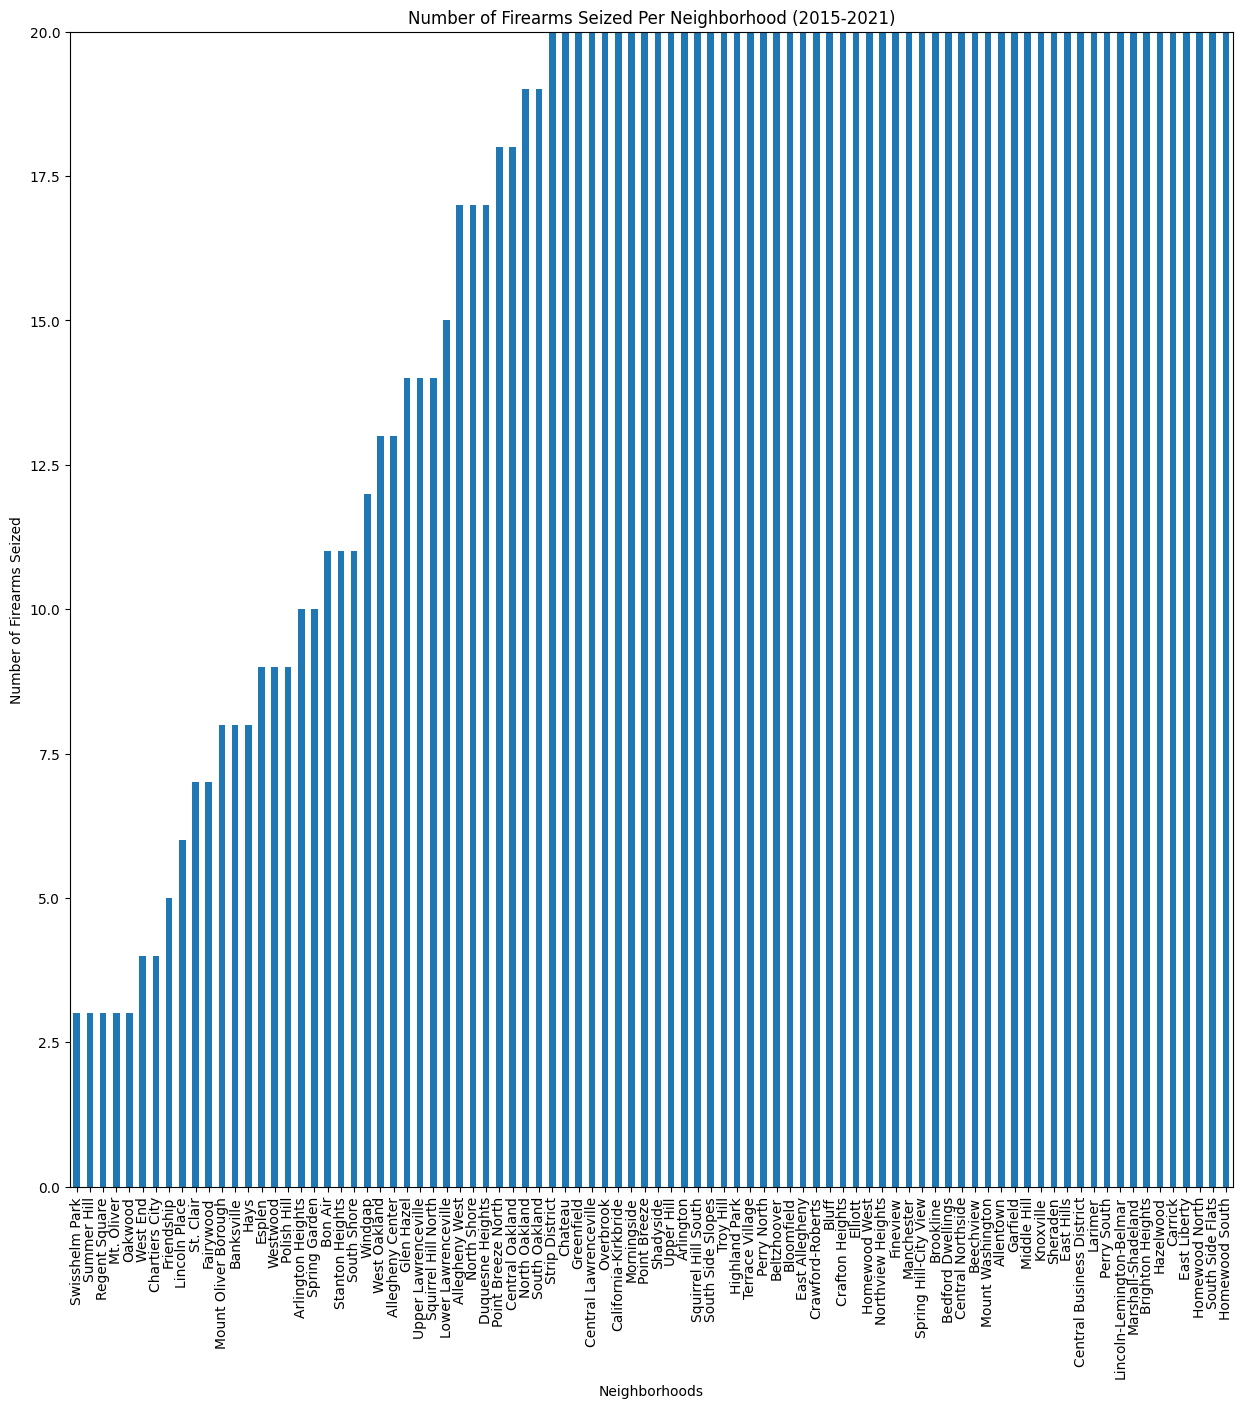

In [59]:
import csv
import pandas as pd
import geopandas
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# load data from a downloaded data set
pol = pd.read_csv("https://data.wprdc.org/datastore/dump/e967381d-d7e9-48e3-a2a2-39262f7fa5c4")
pol.dropna()

nfs = pol.groupby('neighborhood')['total_count'].sum().sort_values()
snfs = nfs.head(35)

#Bar Graph
plt.style.use('default')
nfs.plot.bar(figsize=(15,15), ylim=[0,20])
plt.title("Number of Firearms Seized Per Neighborhood (2015-2021)")
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Firearms Seized")

These 5 neighborhoods are Swisshelm Park, Summer Hill, Regent Square, Oakwood and Mt. Oliver. The safest neighborhood will most likely be one of these first 5 neighborhoods.

The amount of firearm seizures are relatively low around Pittsburgh, with most neighborhoods having under a hundred firearms seized. However, Homewood south proved to be an outlier with 300 total firearm seizures. The heat map makes it fairly obvious where Homewood is located.

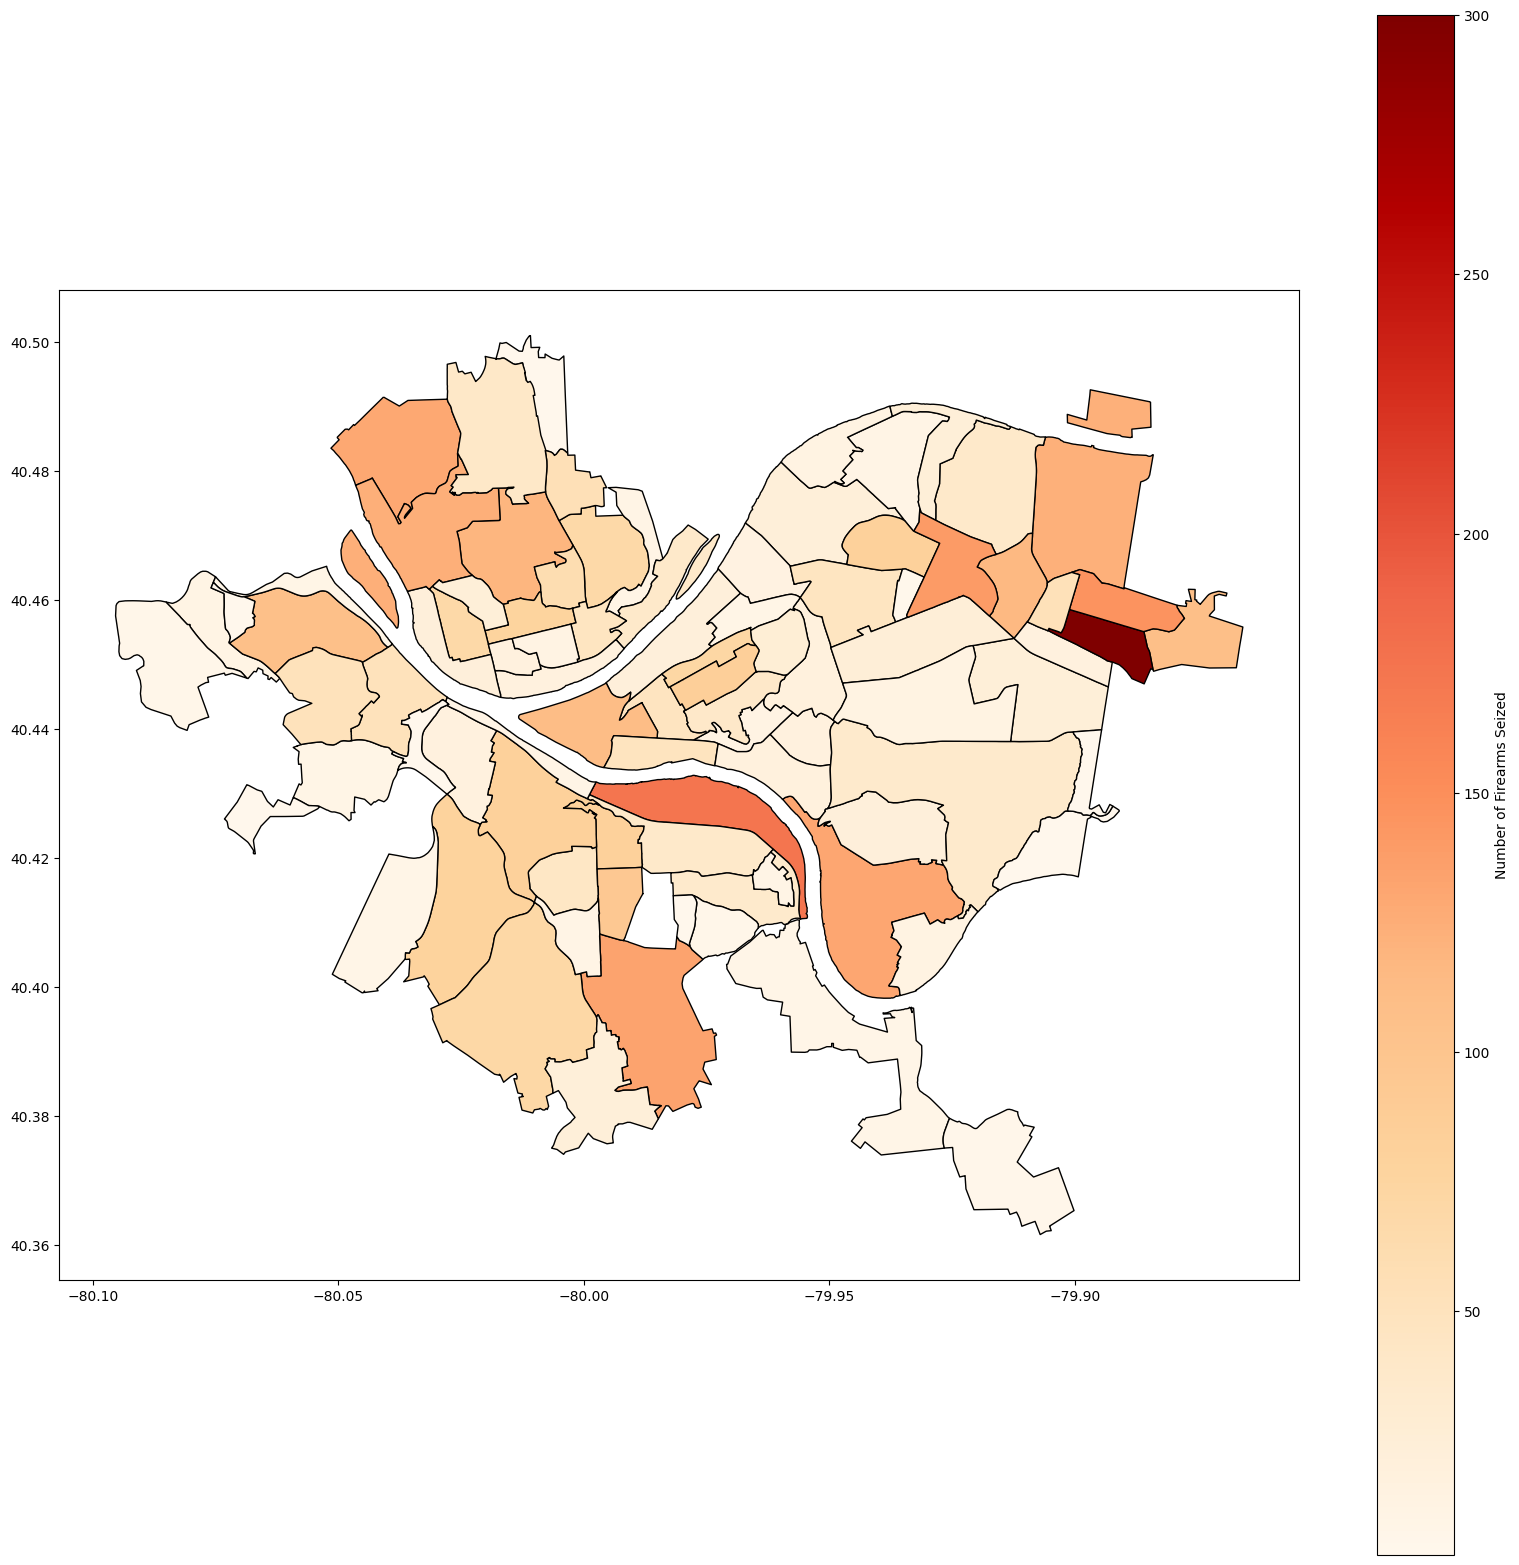

In [27]:
#Heat Map
count = 1
pol["number_of_firearms_seized"] = count
num_guns = pol.groupby("neighborhood").sum()['total_count']
num_guns.sort_values(ascending=False)
neighborhoods = geopandas.read_file("final-project/Neighborhoods/Neighborhoods_.shp")
gun_map = neighborhoods.merge(num_guns, how='left', left_on='hood',right_on='neighborhood')
gun_map.plot(column='total_count', cmap='OrRd', edgecolor="black", legend=True, legend_kwds = {'label': "Number of Firearms Seized"}, figsize = (20,20))

Moving on to the next dataset, we are going to analyze the number of fires per neighborhood. Much like firearm seizures, the amount of fire incidents show how potentially dangerous a neighborhood is. Once again, a select few neighborhoods come in with a very low amount of reported fire incidents. The aptly named heat map works well with this dataset.

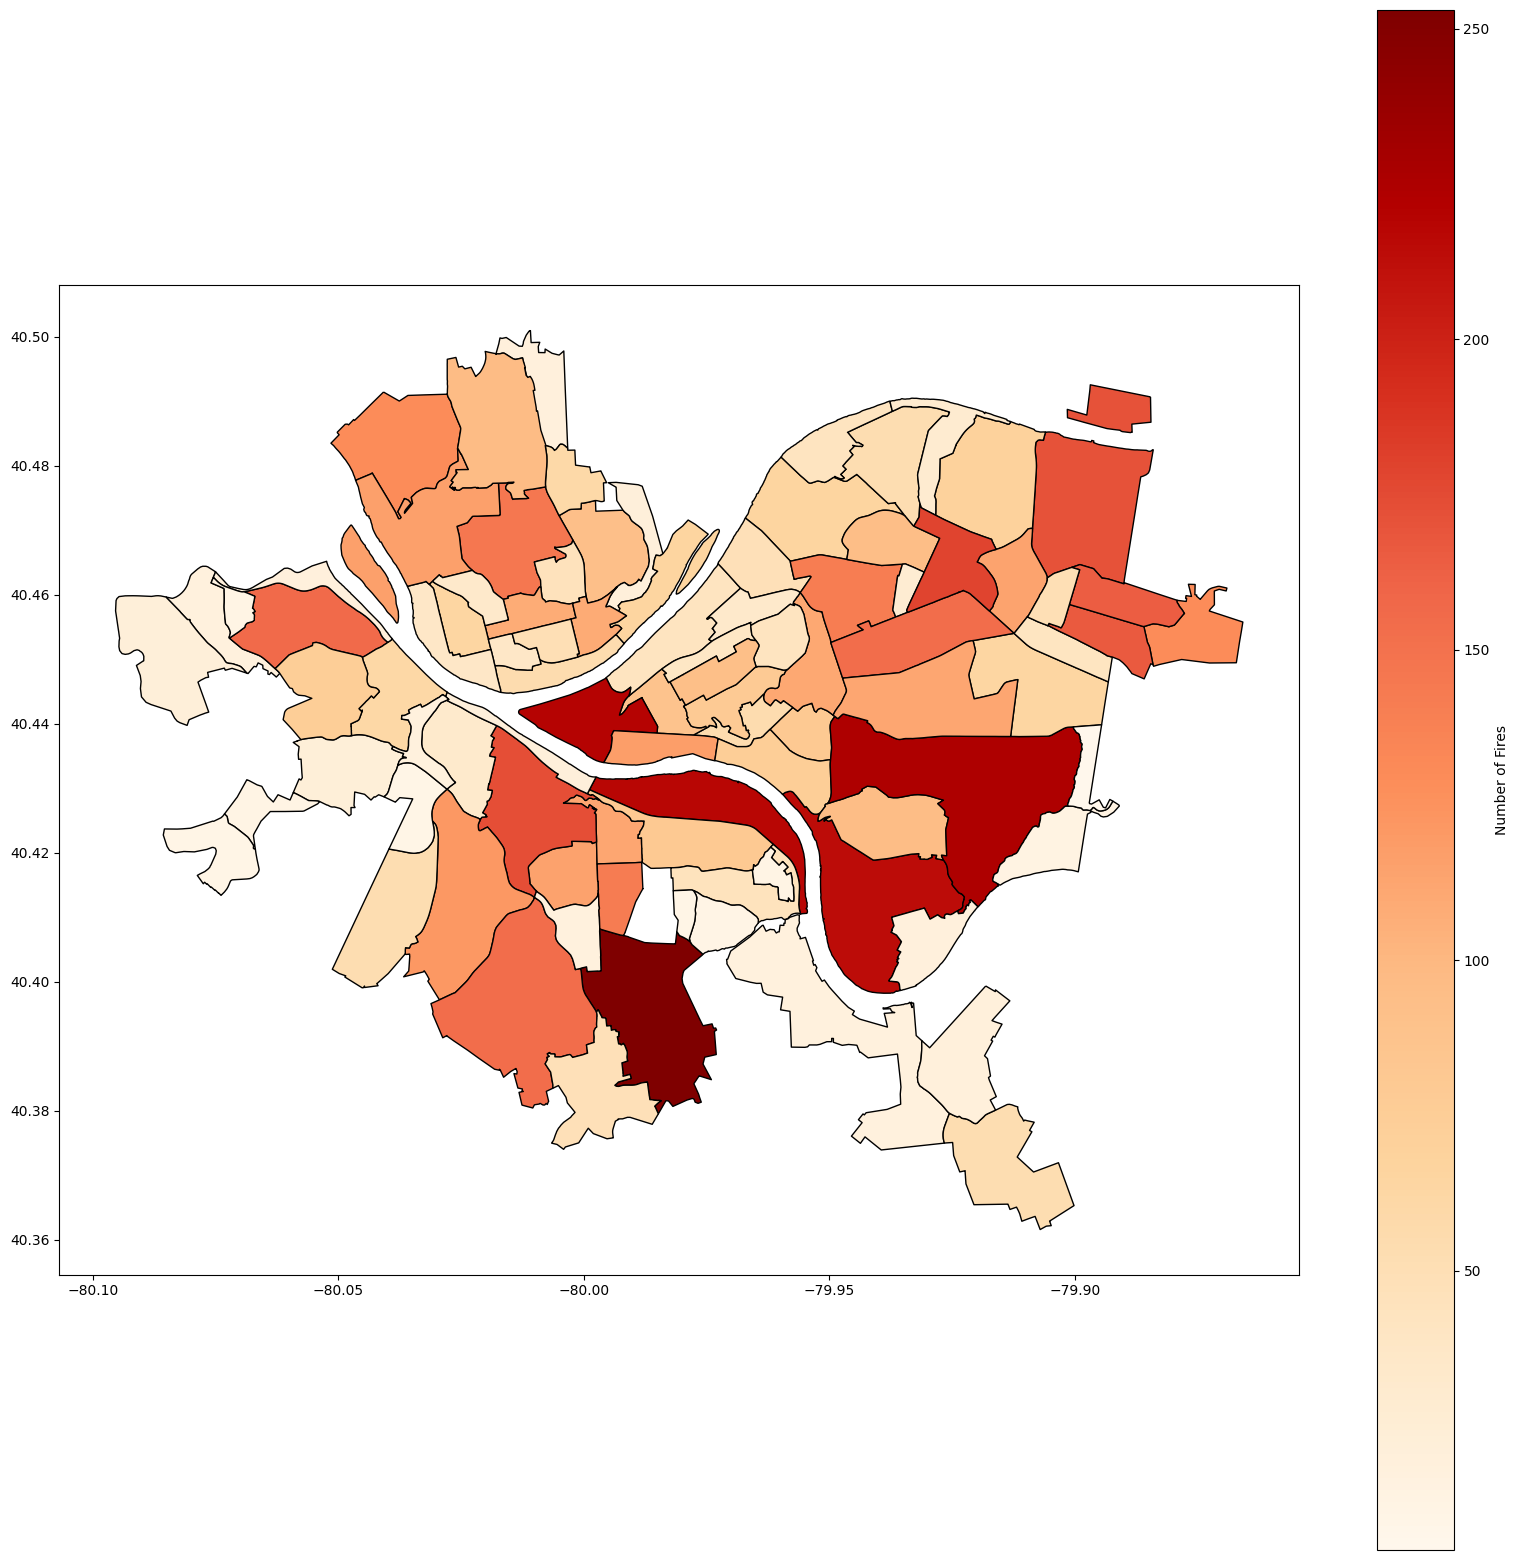

In [30]:
#Loading the Data
df = pd.read_csv("https://data.wprdc.org/datastore/dump/8d76ac6b-5ae8-4428-82a4-043130d17b02")
df = df.dropna()
nbh = df['neighborhood'].value_counts().sort_values(ascending=True)
#Heat Map
count = 1
df["number_of_fires"] = count
num_fires = df.groupby("neighborhood").sum()['number_of_fires']
num_fires.sort_values(ascending=False)
neighborhoods = geopandas.read_file("final-project/Neighborhoods/Neighborhoods_.shp")
fire_map = neighborhoods.merge(num_fires, how='left', left_on='hood',right_on='neighborhood')
fire_map.plot(column='number_of_fires', cmap='OrRd', edgecolor="black", legend=True, legend_kwds = {'label': "Number of Fires"}, figsize=(20,20))

As a side note, the dark red neighborhood is Carrick, which came in with a total of 252 fire incidents. Carrick had about 30 more incidents compared to the next highest neighborhood.


Text(0, 0.5, 'Number of Fires')

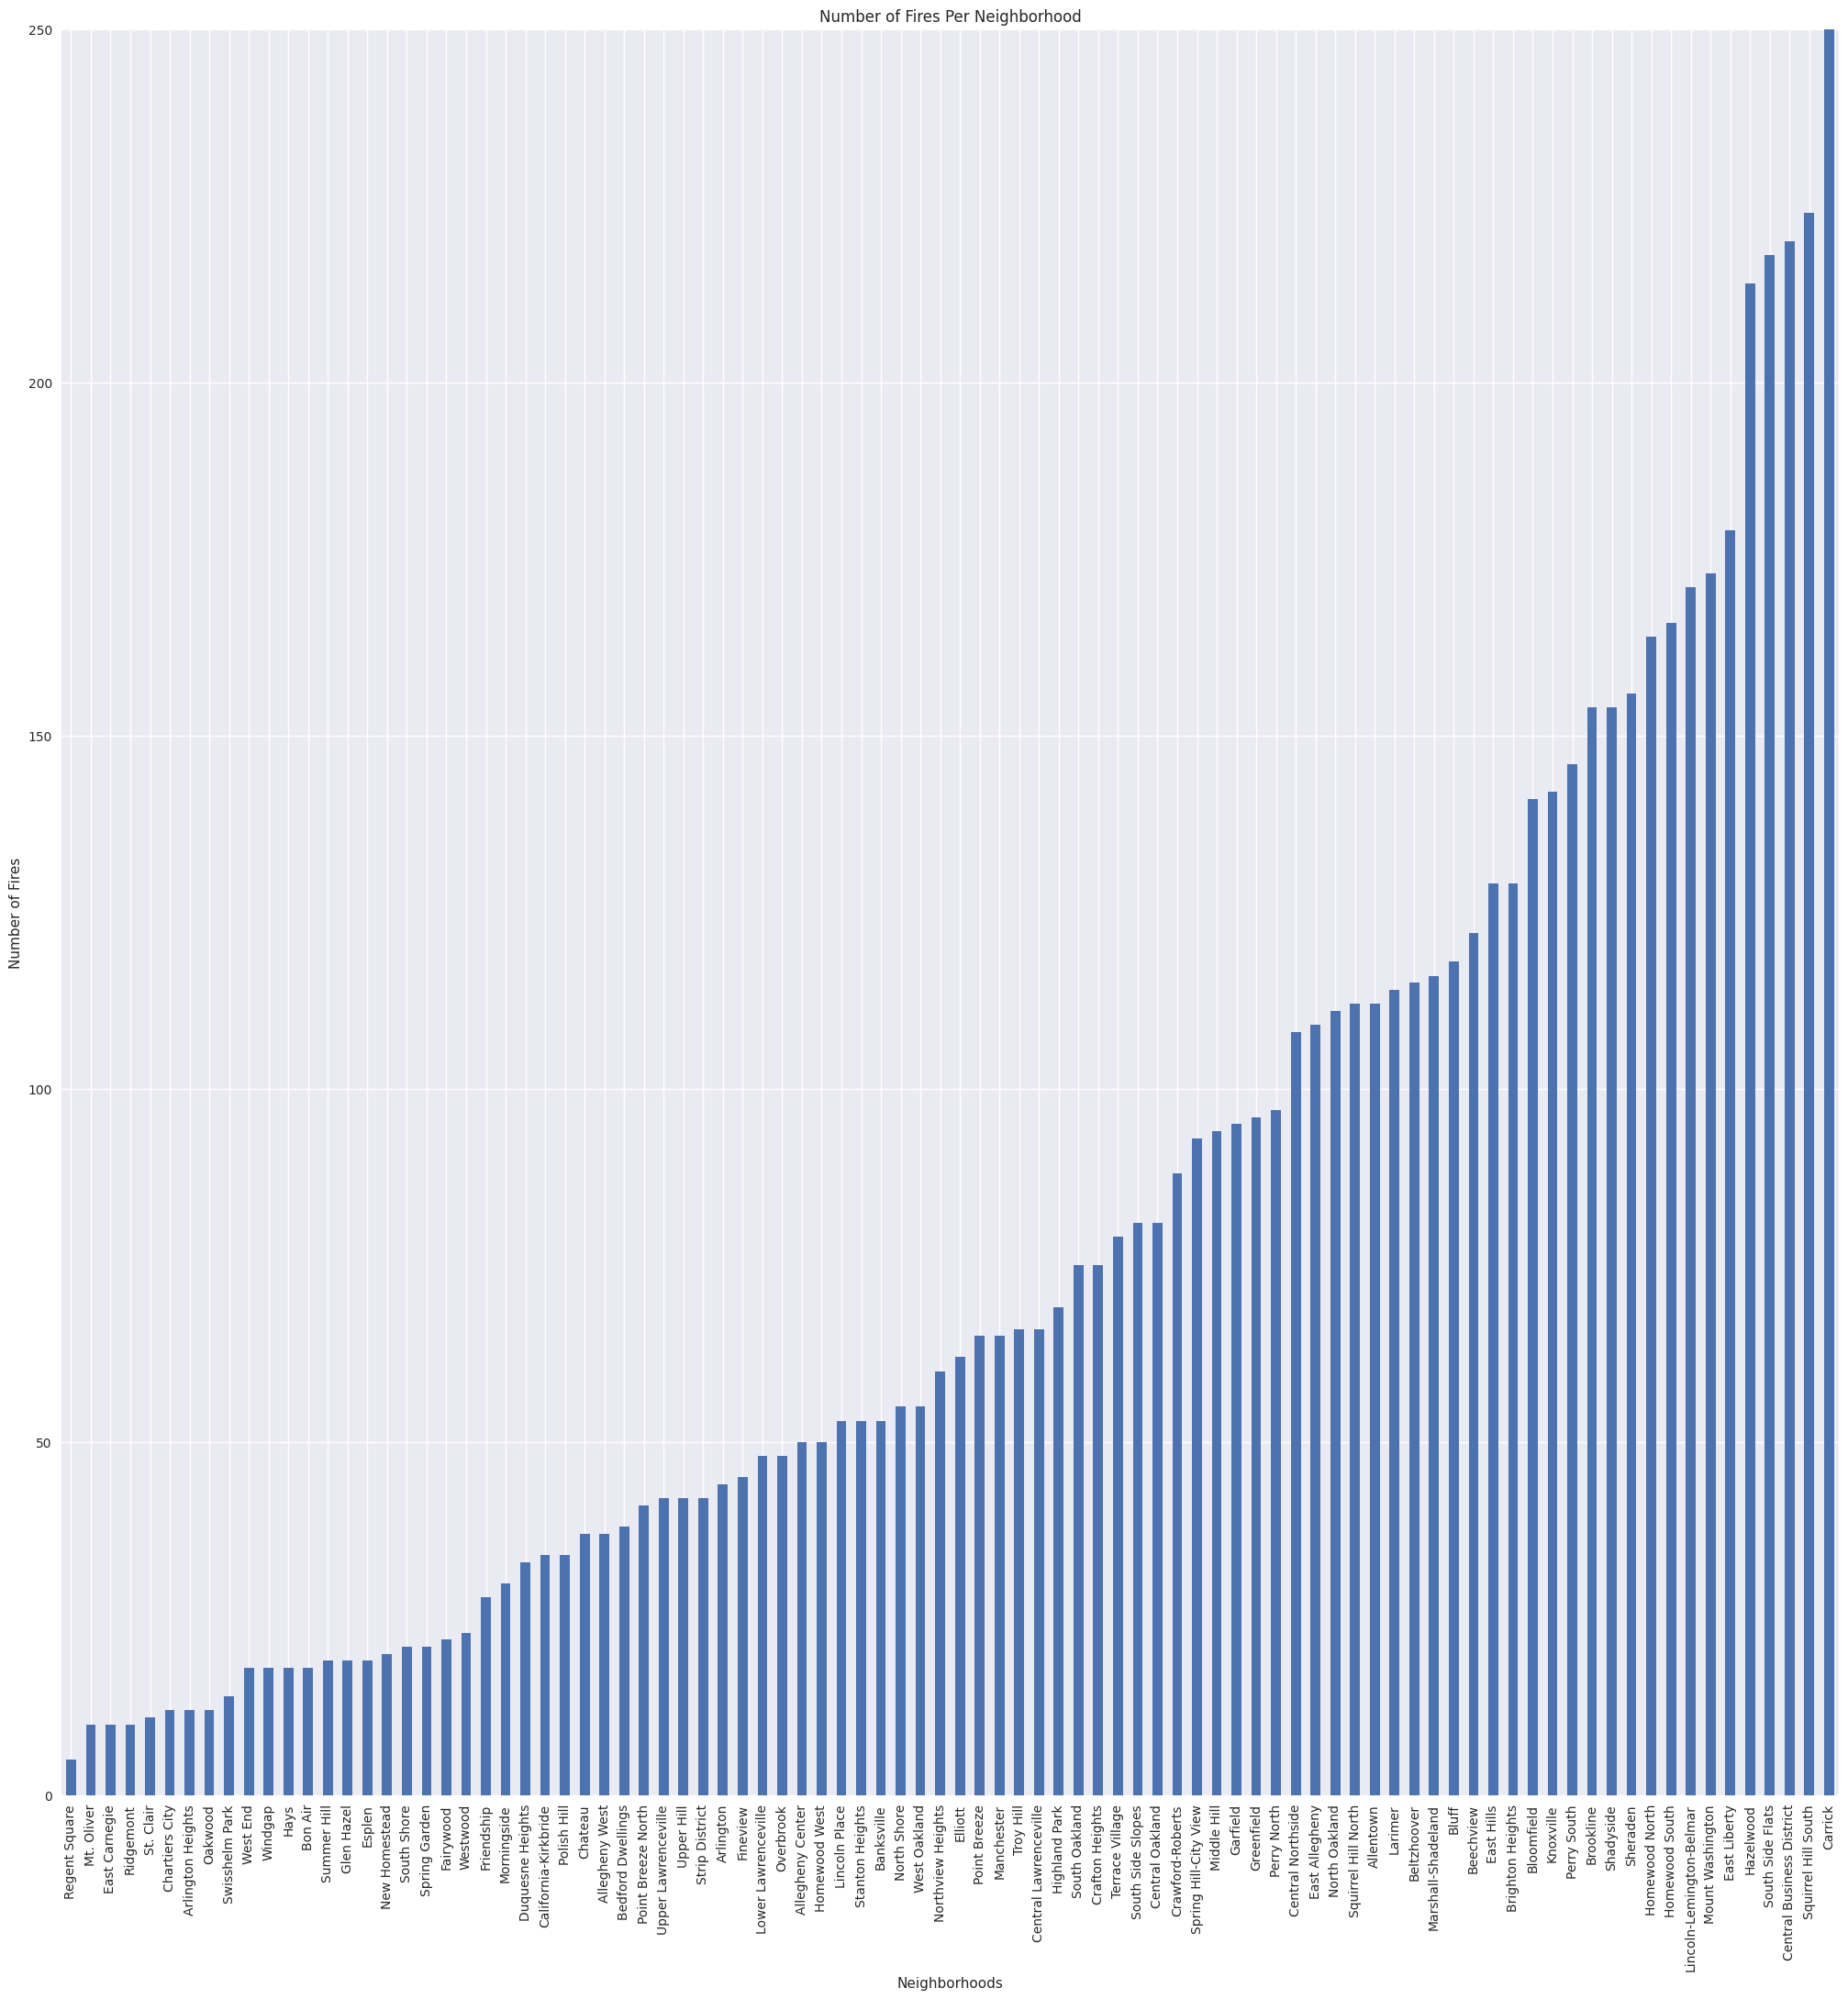

In [31]:
#Bar Graph
plt.style.use('seaborn')
nbh.plot.bar(figsize=(25,25), ylim=[0,250])
plt.title("Number of Fires Per Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Fires")

The one neighborhood that came in lower than all the others, with just 5 reported fires, is Regent Square. The next lowest number of fire incidents is 10, which is shared by East Carnegie, Mt. Oliver, and Ridgemont. This eliminates some of the first 5 neighborhoods from contention, since they did not have low enough finishes in both categories.

Our final dataset is the number of arrests per neighborhood. While this dataset does not just include violent or dangerous crimes, it provides a good overview of the total amount of crime per neighborhood. We’ll start by looking at the bar graph which shows just how big the gap is between the most and least arrests. 


Text(0, 0.5, 'Arrests')

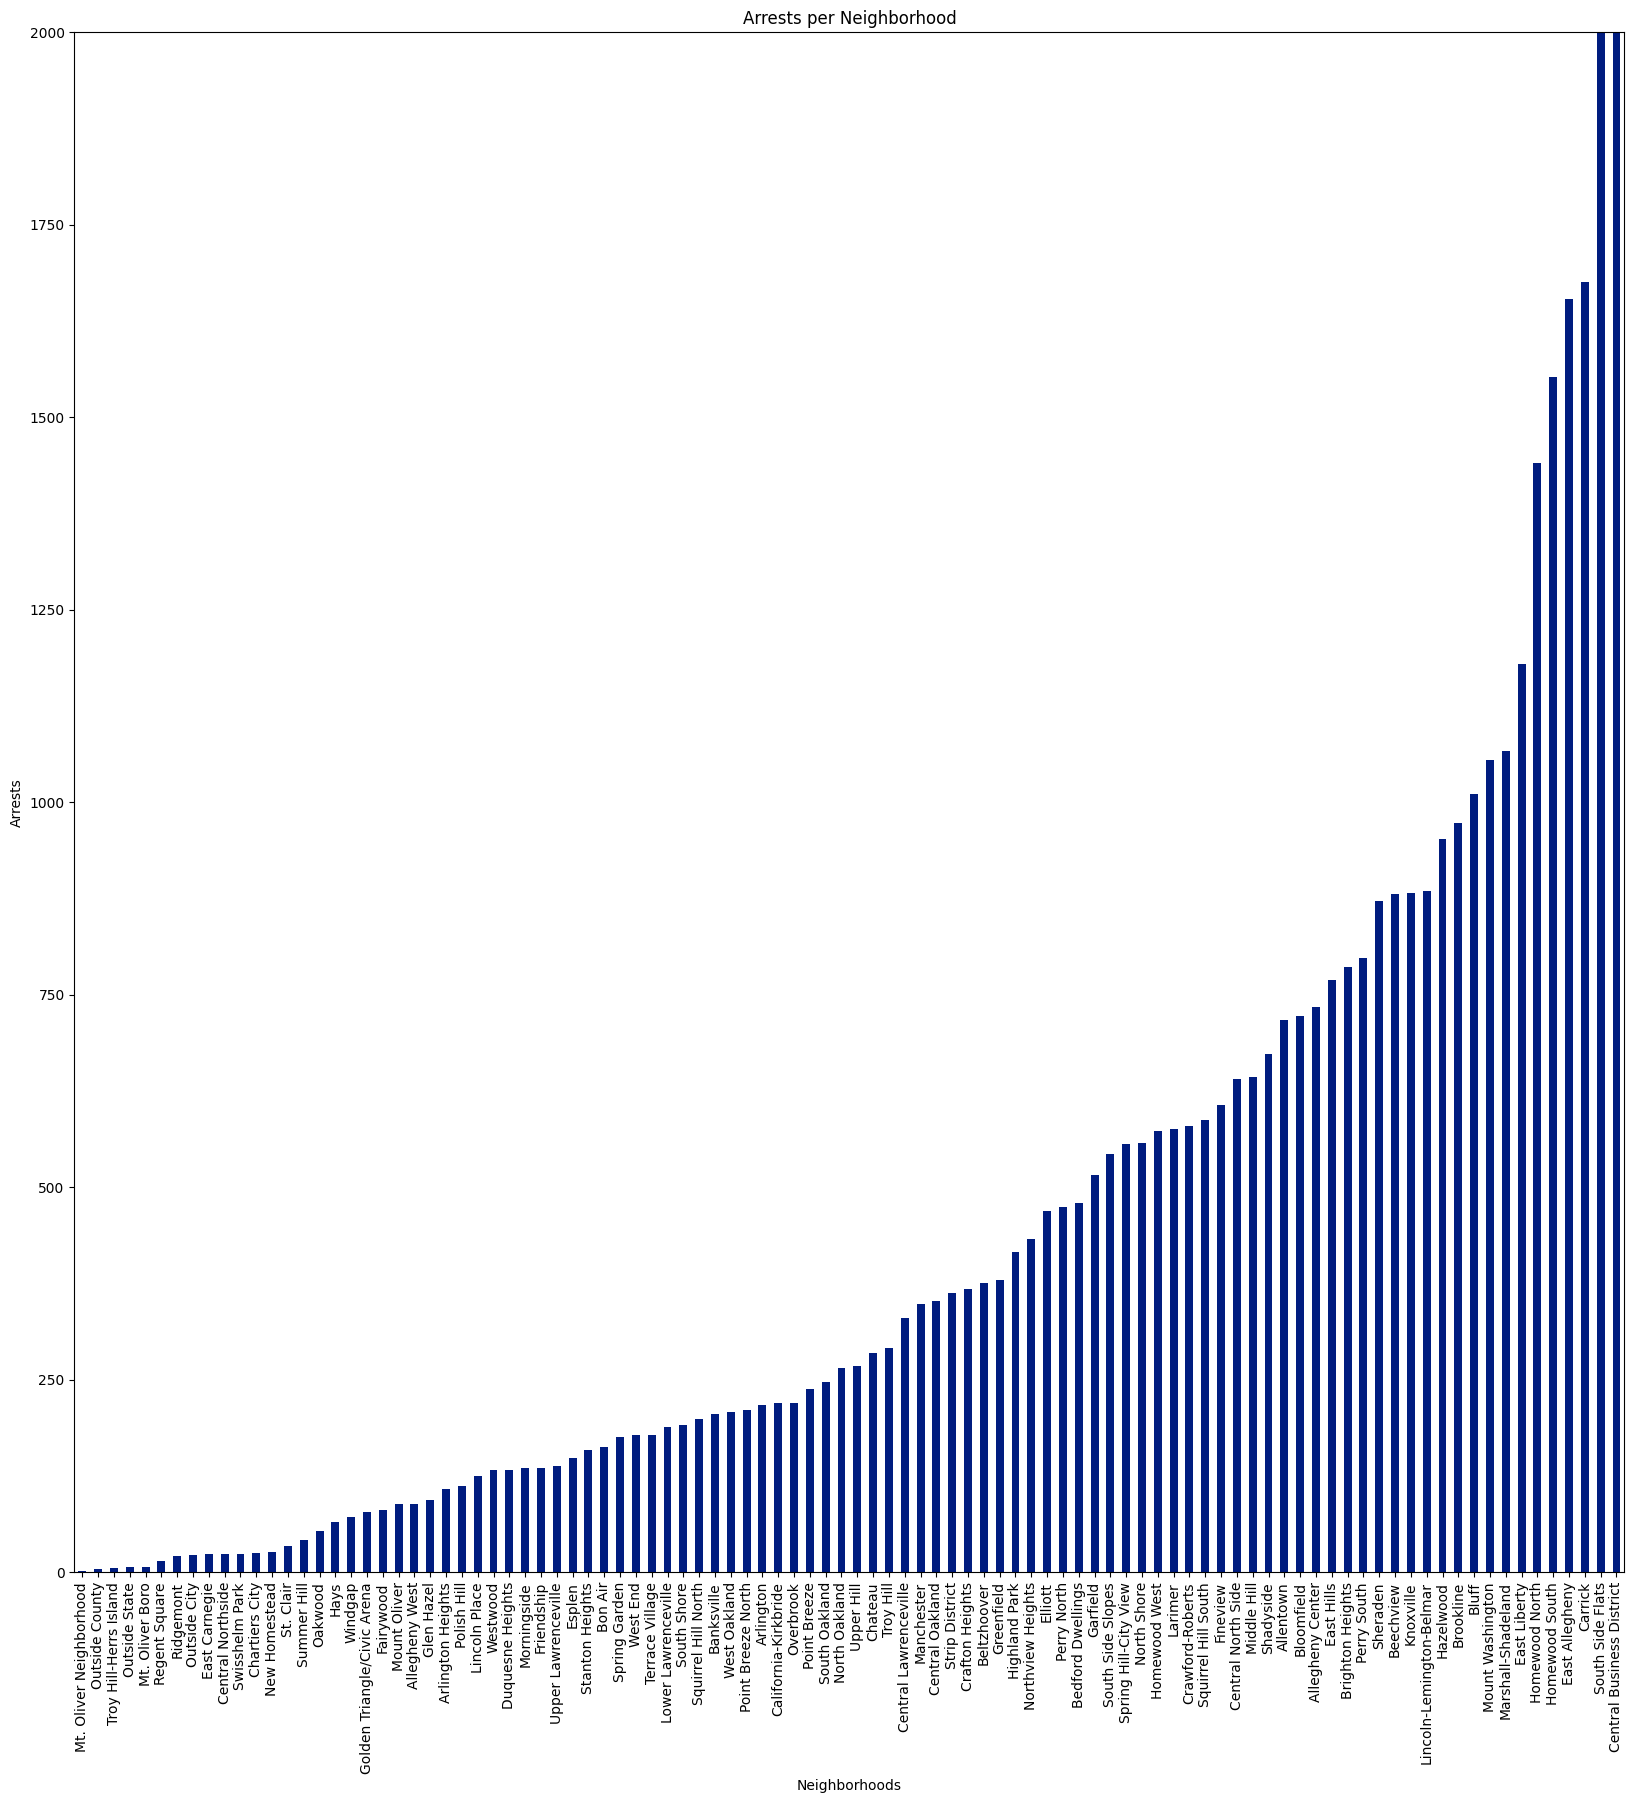

In [110]:
data = pd.read_csv("https://data.wprdc.org/datastore/dump/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f", index_col = "PK")
data = data.dropna()
data_plot = data['INCIDENTNEIGHBORHOOD'].value_counts().sort_values(ascending=True)
#Bar Graph
plt.style.use('seaborn-dark-palette')
data_plot.plot.bar(figsize=(20,20), ylim=[0,2000])
plt.title("Arrests per Neighborhood")
plt.xlabel("Neighborhoods")
plt.ylabel("Arrests")

The two neighborhoods with the most arrests are the South Side Flats with 2517 arrests and the Central Business District with 2817 arrests. The reason the Business District might have so many arrests is because it's a very busy and popular area of Pittsburgh especially at night. You can see these two neighborhoods well on the heat map. 

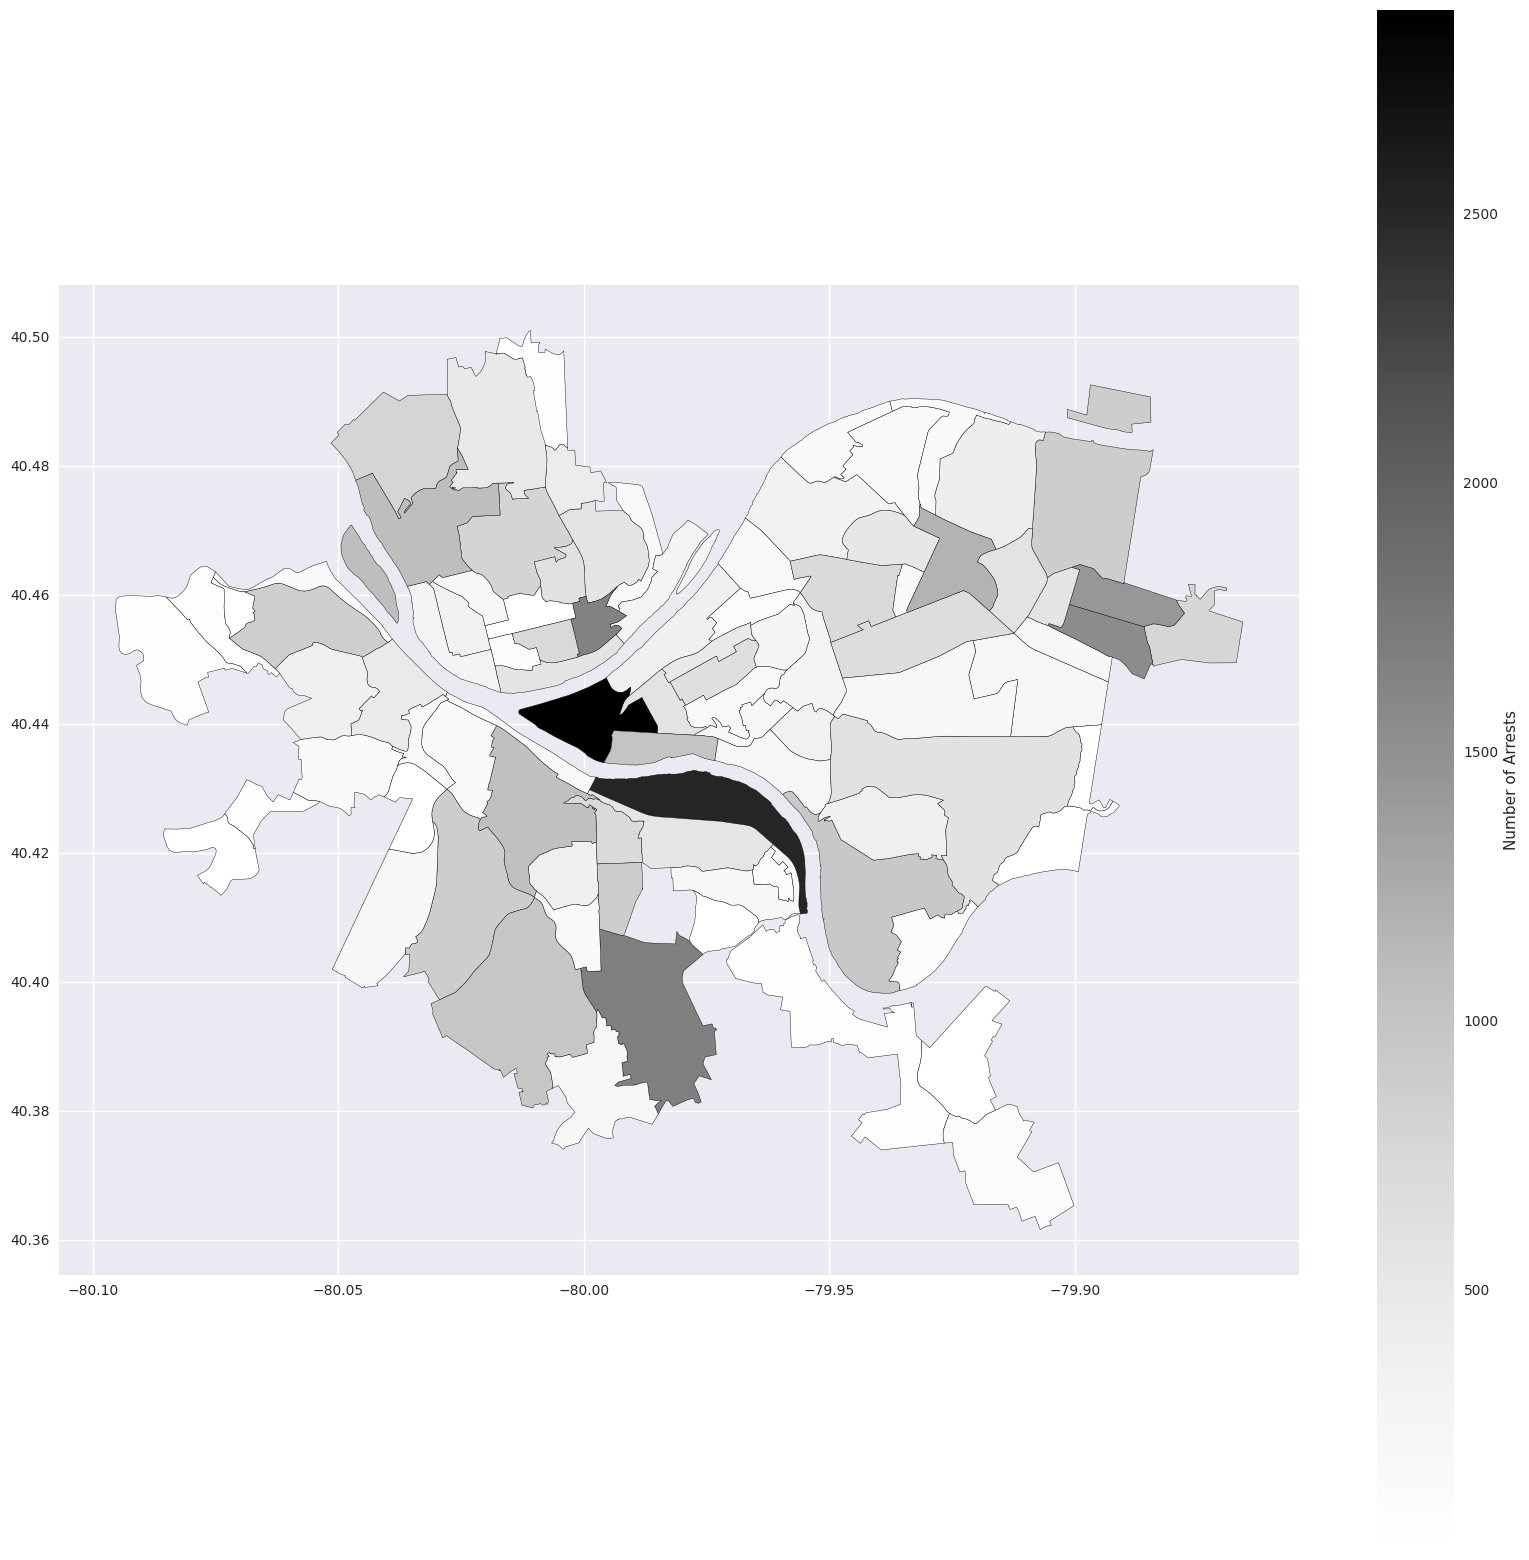

In [34]:
count = 1
data["number_of_arrests"] = count
arrests = data.groupby("INCIDENTNEIGHBORHOOD").sum()["number_of_arrests"]
arrests.sort_values(ascending=False)
neighborhoods = geopandas.read_file("final-project/Neighborhoods/Neighborhoods_.shp")
arrest_map = neighborhoods.merge(arrests, how='left', left_on='hood',right_on='INCIDENTNEIGHBORHOOD')
arrest_map.plot(column='number_of_arrests', cmap='Greys', edgecolor="black", legend=True, legend_kwds = {'label': "Number of Arrests"}, figsize=(20,20))

On the other end of the graph we have just 2 neighborhoods with under 10 arrests per neighborhood. The first neighborhood is Troy Hill-Herrs Island with just 5 arrests followed by Mt. Oliver neighborhood and borough with a combined 9 arrests. The next lowest neighborhoods are Regent Square with 15 arrests which is followed by Ridgemont, East Carnegie, and Swisshelm Park with 23 arrests each. 

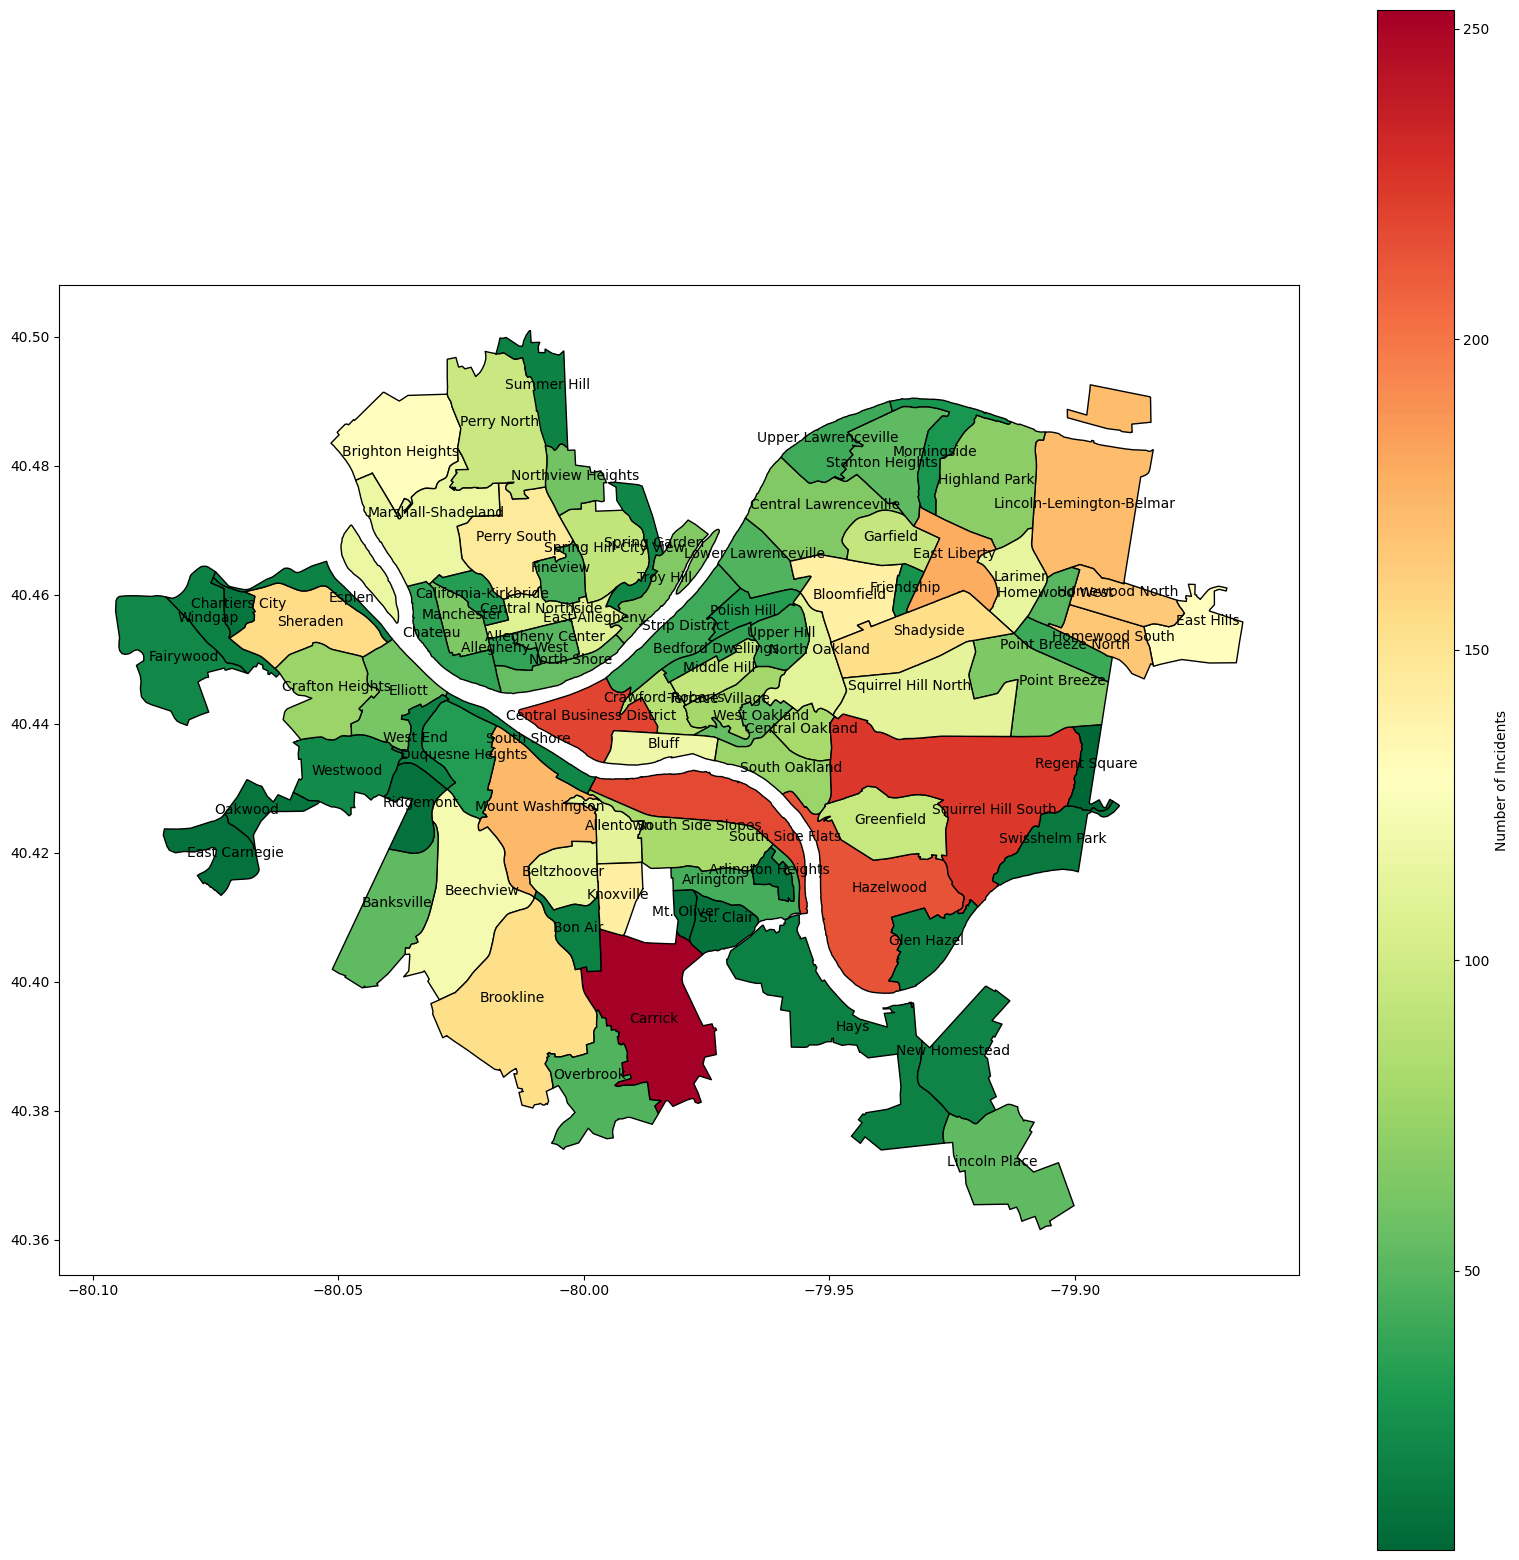

In [109]:
# Combined Heat Map
frames = [nbh, nfs, data_plot]
chm = pd.concat(frames, axis = 0, join = "outer")
count = 1
df["number_of_incidents"] = count
num_incid = df.groupby("neighborhood").sum()['number_of_incidents']
num_incid.sort_values(ascending=False)
neighborhoods = geopandas.read_file("final-project/Neighborhoods/Neighborhoods_.shp")
incid_map = neighborhoods.merge(num_incid, how='left', left_on='hood',right_on='neighborhood')
incid_map.plot(column='number_of_incidents', cmap='RdYlGn_r', edgecolor="black", legend=True, legend_kwds = {'label': "Number of Incidents"}, figsize=(20,20))
incid_map['coords'] = incid_map['geometry'].apply(lambda x: x.representative_point().coords[:])
incid_map['coords'] = [coords[0] for coords in incid_map['coords']]
for idx, row in incid_map.iterrows():
    plt.annotate(s=row['hood'], xy=row['coords'],horizontalalignment='center')

This heat map combines all our data showing the safest neighborhoods in green and the most dangerous neighborhoods in red. The neighborhoods are ranked based on total incidents. This means al firearm sezires, fires, and arrests were added together to get a final value. While it is very close, there is one winner. With the lowest amount of total incidents, Mt. Oliver is the overall winner with just 22 incidents total. Regent square comes in at a very close 2nd place, having 23 total incidents, 1 more than Mt. Oliver. Mt. Oliver won by having one less recorded fire incident. Both Mt. Oliver and Regent Square should be thought of as the safest neighborhoods in Pittsburgh. Honorable mentions go out to East Carnegie and Ridgemont which are also very safe neighborhoods. Conversely, Southside flats and Carrick are the most dangerous neighborhood finishing with a high amount of incidents in every dataset.

# Conlcusion